Результат по выполнению заданий необходимо предоставить в виде ссылки на файл формата Jupyter (ipynb) в github.

1. Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

2. Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

3. Построить круговую диаграмму по количеству ТОП-10 популярных имен, начинающихся на R за 1950 год.

4. Построить точечную диаграмму по количеству согласных букв в имени и частоте употребления за 100 лет.

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline 

## 1

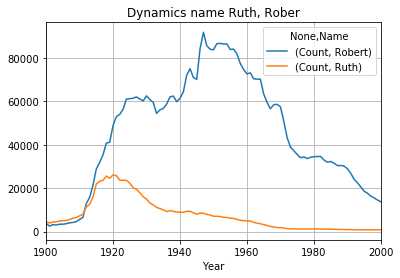

In [2]:
names_by_year = {}
for year in range(1900, 2001):
    names_by_year[year] = pd.read_csv(
        '/Users/Noxser/_Anaconda_exersize/4-2/names/yob{}.txt'.format(year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
name_dynamics = names_all.groupby([names_all.index.get_level_values(0),'Name']).sum()
name_Ruth_Robert = name_dynamics.query('Name == ["Ruth","Robert"]').unstack('Name')
name_Ruth_Robert.plot(title='Dynamics name Ruth, Rober', grid=True)

## 2

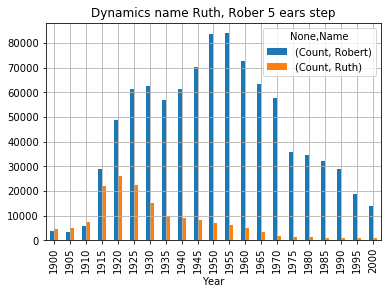

In [3]:
names_by_year = {}
for year in range(1900, 2001, 5):
    names_by_year[year] = pd.read_csv(
        '/Users/Noxser/_Anaconda_exersize/4-2/names/yob{}.txt'.format(year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
name_dynamics = names_all.groupby([names_all.index.get_level_values(0),'Name']).sum()
name_Ruth_Robert_5 = name_dynamics.query('Name == ["Ruth","Robert"]').unstack('Name')
name_Ruth_Robert_5.plot.bar(title='Dynamics name Ruth, Rober 5 ears step', grid=True)

## 3

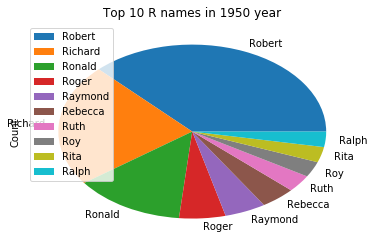

In [4]:
names_by_1950 = pd.read_csv(
        '/Users/Noxser/_Anaconda_exersize/4-2/names/yob1950.txt',
        names=['Name','Gender','Count']
    )

names_R = names_by_1950[(names_by_1950.Name.str.startswith("R"))]

names_RR = names_R.sort_values(by='Count', ascending =False).head(10)

names_RR.plot.pie(y = 'Count',
                  use_index=False, 
                  title = 'Top 10 R names in 1950 year',
                  labels = names_RR.Name, 
                 )

## 4

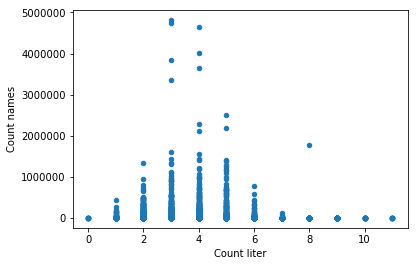

In [5]:
names_by_year = {}
for year in range(1900, 2001, 1):
    names_by_year[year] = pd.read_csv(
        '/Users/Noxser/_Anaconda_exersize/4-2/names/yob{}.txt'.format(year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year)
name_dynamics = names_all.groupby('Name').sum().sort_values(by='Count', ascending =False)

def count_liter(row):
    liter = ['B', 'C', 'D', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N','P', 'Q', 'R', 'S', 'T', 'V', 
             'W', 'X', 'Y', 'Z'
            ] 
    n = 0
    for i in row.Name:
        if i.upper() in liter:
            n+=1
    return n

x = name_dynamics.reset_index() # нашел такой вариант чтобы применить функцию к строчкам
x['Count_liter'] = x.apply(count_liter, axis=1)
x.plot.scatter(x='Count_liter', y='Count')
plt.xlabel('Count liter')
plt.ylabel('Count names')